# AMES IOWA HOUSING PROJECT


# Ovjective:


- Provide analysis on housing market in Ames, Iowa


- Identify key features that have the greatest impact on selling price in Ames, Iowa


- Provide  best fit model that predicts the selling price Ames, Iowa


### Project summary:


The way I tackle this project:


1. I started of by cleaning the data. The data contained many null values and zeros, so these should have been taken care of, but for my first model I wanted to use as many features as possible so that I can further analyze their impact on the housing saleprice.


2. I created my first model using Linear Regression, Ridge and Lasso models


3. I reviewed the score and went on to further analyze the features and their correlation to the housing sale price. I cleaned data with null values in a more thourough and concise way.


4. Then I executed feature engineering, which I get to in more detail in the sections itself


5. I created the second model in order to filter our the the features that were given the strongest, i.e. highest absolute value. And created a third model using this features only.


6. In the visualization section I used different python modules to see the relationship of the indvidual features to the housing sale price


7. The last section covers my conclusions to the housing project

### Here are some quick links if you want to jump to a particular section:
1. [Initial data analysis](#Initial)
2. [Dealing with null values](#Dealing)
3. [Feature engineering](#Feature)
4. [Model](#Model)
5. [Coefficients analysis](#Coefficients)
6. [Predicting on test dataset](#Test)
7. [Feature visualization and EDA](#Featurevis)
8. [Conclusion](#Conclusion)

## <a name = 'Initial'> Initial data analysis </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('datasets/train.csv')
pd.set_option('max_columns', 85)
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
df.shape

(2051, 81)

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

**Checking for null values and zeros**

In [5]:
df.isnull().sum().sum()

9822

In [6]:
# this is zero_counter function
def zero_count(dataframe):
    count = 0
    for i in dataframe:
        if i == 0:
            count += 1
    return count

In [7]:
zeros_lst = []
for col in df.columns:
    zero_count(df[col])
    zeros_lst.append(zero_count(df[col]))
zeros_df = pd.DataFrame(zeros_lst, index=df.columns)
print(f'created zeros_lst and zeros_df')

created zeros_lst and zeros_df


In [8]:
zero_cols = list(zeros_df[zeros_df[0] > 0].index)

In [9]:
col_nulls = [c for c in df.columns if df[c].isnull().sum() > 0]

In [10]:
for i in zero_cols:
    col_nulls.append(i)

In [11]:
# numerical columns with either nulls or zeros
num_cols = [c for c in df[col_nulls]._get_numeric_data().columns]

In [12]:
# categorical columns with null values
cat_cols = [c for c in col_nulls if c not in num_cols]

In [13]:
def check_unique(dataframe, col_lst):
    for i in dataframe[col_lst]:
        print(f'{[i]}: {dataframe[i].unique()}')

In [14]:
# checking what kind of data in the nulls and zeros columns
check_unique(df, cat_cols)

['alley']: [nan 'Pave' 'Grvl']
['mas_vnr_type']: ['BrkFace' 'None' nan 'Stone' 'BrkCmn']
['bsmt_qual']: ['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
['bsmt_cond']: ['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
['bsmt_exposure']: ['No' 'Gd' 'Av' nan 'Mn']
['bsmtfin_type_1']: ['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
['bsmtfin_type_2']: ['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']
['fireplace_qu']: [nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
['garage_type']: ['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']
['garage_finish']: ['RFn' 'Unf' 'Fin' nan]
['garage_qual']: ['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
['garage_cond']: ['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
['pool_qc']: [nan 'Fa' 'Gd' 'Ex' 'TA']
['fence']: [nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
['misc_feature']: [nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']


**In case you want to see the first model here's the link to** [First model]('./First_model.ipynb')

In [15]:
# function that prints out the actual entries in categorical columns
for i in df.columns:
    if i in cat_cols:
        print(f'{[i]}: {df[i].value_counts()}')
        print(f'{[i]}: {df[i].value_counts().sum()} out of {len(df[i])}')

['alley']: Grvl    85
Pave    55
Name: alley, dtype: int64
['alley']: 140 out of 2051
['mas_vnr_type']: None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64
['mas_vnr_type']: 2029 out of 2051
['bsmt_qual']: TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64
['bsmt_qual']: 1996 out of 2051
['bsmt_cond']: TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64
['bsmt_cond']: 1996 out of 2051
['bsmt_exposure']: No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64
['bsmt_exposure']: 1993 out of 2051
['bsmtfin_type_1']: GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64
['bsmtfin_type_1']: 1996 out of 2051
['bsmtfin_type_2']: Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64
['bsmtfin_type_2']: 1995 out of 2051
['fireplace_qu']: Gd    523
TA    407
Fa     59
Po

##  <a name = 'Dealing' > Dealing with null and zero values </a>

**Information in following columns: {alley, pool_qc, fence, misc_feature} is not sufficient for the model**

In [16]:
# drop non-informative columns with a lot of null values and 'pid'
df_nonull = df.drop(['pid', 'pool_qc', 'misc_feature', 'alley', 'fence'], axis=1)

# drop contradictory rows
df_nonull = df_nonull.drop(df.loc[(df['bsmt_exposure'].isnull()) & (df['bsmt_qual'].notnull()), :].index)

In [17]:
zerlst = []
for col in df.columns:
    if zero_count(df[col]) > 0:
        zerlst.append(col)                

In [18]:
# check to see what kind of impact have columns cointaining zeros
df[zerlst].corrwith(df['saleprice']).sort_values()

enclosed_porch    -0.135656
kitchen_abvgr     -0.125444
bsmt_half_bath    -0.045328
low_qual_fin_sf   -0.041594
misc_val          -0.007375
bsmtfin_sf_2       0.016255
pool_area          0.023106
3ssn_porch         0.048732
screen_porch       0.134581
bedroom_abvgr      0.137067
bsmt_unf_sf        0.190210
2nd_flr_sf         0.248452
half_bath          0.283001
bsmt_full_bath     0.283662
wood_deck_sf       0.326490
open_porch_sf      0.333476
bsmtfin_sf_1       0.423519
fireplaces         0.471093
mas_vnr_area       0.512230
full_bath          0.537969
total_bsmt_sf      0.628925
garage_cars        0.648220
garage_area        0.650270
dtype: float64

**Features with 80% values of zeros are not very useful, so should be dropped**

In [19]:
numcols_to_drop = [c for c in df[num_cols] if zero_count(df[c]) >= 1700]

df_nonull = df_nonull.drop(columns=numcols_to_drop)

df_nonull.shape

(2048, 68)

In [20]:
df_nonull.isnull().sum().sort_values(ascending=False).head(20)

fireplace_qu      999
lot_frontage      330
garage_qual       114
garage_yr_blt     114
garage_cond       114
garage_finish     114
garage_type       113
bsmtfin_type_2     56
bsmt_qual          55
bsmt_cond          55
bsmt_exposure      55
bsmtfin_type_1     55
mas_vnr_type       22
mas_vnr_area       22
bsmt_full_bath      2
bsmt_unf_sf         1
total_bsmt_sf       1
bsmtfin_sf_1        1
garage_area         1
garage_cars         1
dtype: int64

In [21]:
df_nonull = df_nonull.dropna(subset = ['garage_cars'])

**Dealing with nulls and zeros in numerical columns**

In [22]:
# check what values would be the best fit to fill null values in 'lot_frontage' column
df_nonull['lot_frontage'].describe()

count    1717.000000
mean       69.059406
std        23.281018
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [23]:
print(df_nonull['lot_frontage'].mode())
print(df_nonull['lot_frontage'].mean())
print(df_nonull['lot_frontage'].median())

0    60.0
dtype: float64
69.05940594059406
68.0


In [24]:
df_nonull['lot_frontage'].fillna(df_nonull['lot_frontage'].median(), inplace=True)

In [25]:
# check what values would be the best fit to fill null values in 'mas_vnr_area' column
df_nonull['mas_vnr_area'].describe()

count    2025.000000
mean       99.710123
std       175.082613
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: mas_vnr_area, dtype: float64

In [26]:
print(df_nonull['mas_vnr_area'].median())
print(df_nonull['mas_vnr_area'].mode())

0.0
0    0.0
dtype: float64


In [27]:
#fill 'mas_vnr_area' with zeros to represent absence of masonry veneer
df_nonull['mas_vnr_area'].fillna(0, inplace=True)

In [28]:
df_nonull.isnull().sum().sort_values(ascending=False).head(15)

fireplace_qu      998
garage_yr_blt     113
garage_type       113
garage_cond       113
garage_qual       113
garage_finish     113
bsmtfin_type_2     56
bsmt_qual          55
bsmt_cond          55
bsmt_exposure      55
bsmtfin_type_1     55
mas_vnr_type       22
bsmt_full_bath      2
bsmt_unf_sf         1
total_bsmt_sf       1
dtype: int64

In [29]:
# fill garage yr blt with zeros to represent absence of garage
df_nonull.garage_yr_blt.fillna(0, inplace=True)

In [30]:
df_nonull['mas_vnr_type'].value_counts()

None       1216
BrkFace     628
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

## <a name = 'Feature' > Feature engineering </a>

**Since absence of masonry veneer have quiet a negative impact on the sale price**
 - I will fill null values with None
 - And then binarize 'mas_vnr_type' where 0 would represent absence of masonry veneer and 1 its presence

In [31]:
df_nonull.mas_vnr_type.fillna('None',inplace=True)

In [32]:
df_nonull.mas_vnr_type = df_nonull.mas_vnr_type.map(lambda x: 0 if x=='None' else 1)

**Garage features:**

Absence/presence of a garage plays an important role in the sale price of the house. So the way I am going to handle null values in garage features:
- for garage_type I will create dummies
- garage quality seems to repeat garag_cond, and garage_cond has a higher correlation with the price, so I will drop garage_qual
- I will binarize garage_cond to represent above average condition and below average

In [33]:
df_nonull = df_nonull.drop(['garage_qual'], axis=1)

In [34]:
df_nonull.garage_cond.value_counts()

TA    1865
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [35]:
above_ave = ['Ex', 'Gd', 'TA']
below_ave = ['Fa', 'Po', 'NA']

In [36]:
# checking if the function produces required result
a = df_nonull['garage_cond'].map(lambda cell: 1 if cell in above_ave else 0)
b = df_nonull['garage_cond']
checking_fun = pd.DataFrame({'a': a, 'b': b})

In [37]:
# assigning binary values to garage cond
df_nonull['garage_cond'] = df_nonull['garage_cond'].map(lambda cell: 1 if cell in above_ave else 0)

In [38]:
# checking for null values in the df_nonull
df_nonull.isnull().sum().sort_values(ascending=False).head(10)

fireplace_qu      998
garage_finish     113
garage_type       113
bsmtfin_type_2     56
bsmt_qual          55
bsmt_cond          55
bsmt_exposure      55
bsmtfin_type_1     55
bsmt_full_bath      2
total_bsmt_sf       1
dtype: int64

In [39]:
zeros_lst2 = []
for col in df_nonull.columns:
    zero_count(df_nonull[col])
    zeros_lst2.append(zero_count(df_nonull[col]))
zeros_df2 = pd.DataFrame(zeros_lst2, index=df_nonull.columns)
print(f'created zeros_lst2 and zeros_df2')

created zeros_lst2 and zeros_df2


In [40]:
zeros_df2.sort_values(by=[0], ascending=False).head(15)

,0
half_bath,1305
mas_vnr_type,1238
mas_vnr_area,1236
bsmt_full_bath,1196
2nd_flr_sf,1190
wood_deck_sf,1074
fireplaces,998
open_porch_sf,909
bsmtfin_sf_1,654
garage_cond,168


**Zeros_df2 represent absence of the feature**

In [41]:
df_nonull.half_bath.value_counts()

0    1305
1     724
2      18
Name: half_bath, dtype: int64

**BSMT features analysis**

In [42]:
df_nonull.bsmtfin_type_2.value_counts()

Unf    1745
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [43]:
df_nonull.bsmtfin_type_1.value_counts()

GLQ    615
Unf    600
ALQ    292
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [44]:
df_nonull.bsmt_exposure.value_counts()

No    1338
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [45]:
(df_nonull[(df_nonull['bsmtfin_type_2'].isnull()) | (df_nonull['bsmtfin_type_1'].isnull()) |\
         (df_nonull['bsmt_exposure'].isnull()) | (df_nonull['bsmt_cond'].isnull())]).shape

(56, 67)

In [46]:
df_nonull.isnull().mean().sort_values(ascending=False).head(10)

fireplace_qu      0.487543
garage_finish     0.055203
garage_type       0.055203
bsmtfin_type_2    0.027357
bsmt_qual         0.026869
bsmt_cond         0.026869
bsmt_exposure     0.026869
bsmtfin_type_1    0.026869
bsmt_full_bath    0.000977
total_bsmt_sf     0.000489
dtype: float64

In [47]:
# checking if bsmtfin_type_2 has any impact
bsmt_dum = pd.get_dummies(df_nonull['bsmtfin_type_2'])
bsmt_dum['saleprice'] = df_nonull['saleprice']
bsmt_dum.corr()[['saleprice']]

,saleprice
ALQ,0.011845
BLQ,-0.048430
GLQ,0.053572
LwQ,-0.041983
Rec,-0.042991
Unf,0.113841
saleprice,1.000000


In [48]:
df_nonull.bsmtfin_type_1.value_counts()

GLQ    615
Unf    600
ALQ    292
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [49]:
# checking if bsmtfin_type_1 has any impact
bsmt_dum2 = pd.get_dummies(df_nonull['bsmtfin_type_1'])
bsmt_dum2['saleprice'] = df_nonull['saleprice']
bsmt_dum2.corr()[['saleprice']]

,saleprice
ALQ,-0.087595
BLQ,-0.130030
GLQ,0.464014
LwQ,-0.081366
Rec,-0.150852
Unf,-0.125872
saleprice,1.000000


**BSMT features**
 - I will drop bsmtfin_type_2 since it has low correlation as opposed to bsmtfin_type_1
 - In bsmtfint_type_1 only GLQ category has impact on the price, so I will binarize it to GLQ = 1 and rest = 0
 - it may seem like a good idea to binarize bsmt_exposure, but if we are to look closer to at correlation with the features, bsmt_exposure_Gd category certainly adds up to to the price, so I will dummify it

In [50]:
df_nonull = df_nonull.drop(columns = 'bsmtfin_type_2')
df_nonull['bsmtfin_type_1'] = df_nonull['bsmtfin_type_1'].map(lambda cell: 1 if cell=='GLQ' else 0)
df_nonull.isnull().sum().sort_values(ascending=False).head(5)

fireplace_qu     998
garage_finish    113
garage_type      113
bsmt_qual         55
bsmt_cond         55
dtype: int64

> **I will create dummies for categorical features**

> **To avoid duplicating information I will not be converting zeros to None in categorical features in order to create None, i.e. absence of the feature, since there's already zeros in numerical related features, e.g. garages.**

In [51]:
nonull_with_dummies = pd.get_dummies(df_nonull)

In [52]:
nonull_with_dummies.isnull().sum().sort_values(ascending=False).head(5)

bsmt_full_bath    2
total_bsmt_sf     1
bsmt_unf_sf       1
bsmtfin_sf_1      1
sale_type_WD      0
dtype: int64

In [53]:
# drop rows with null values after dummy creation
nonull_with_dummies.dropna(inplace=True)

# checking correlation
nonull_with_dummies.drop(columns=['id']).corr()[['saleprice']].sort_values('saleprice')

,saleprice
exter_qual_TA,-0.601132
kitchen_qual_TA,-0.540606
bsmt_qual_TA,-0.457651
garage_finish_Unf,-0.433434
garage_type_Detchd,-0.369283
foundation_CBlock,-0.356423
heating_qc_TA,-0.344225
lot_shape_Reg,-0.307196
bsmt_exposure_No,-0.293266
ms_zoning_RM,-0.280620


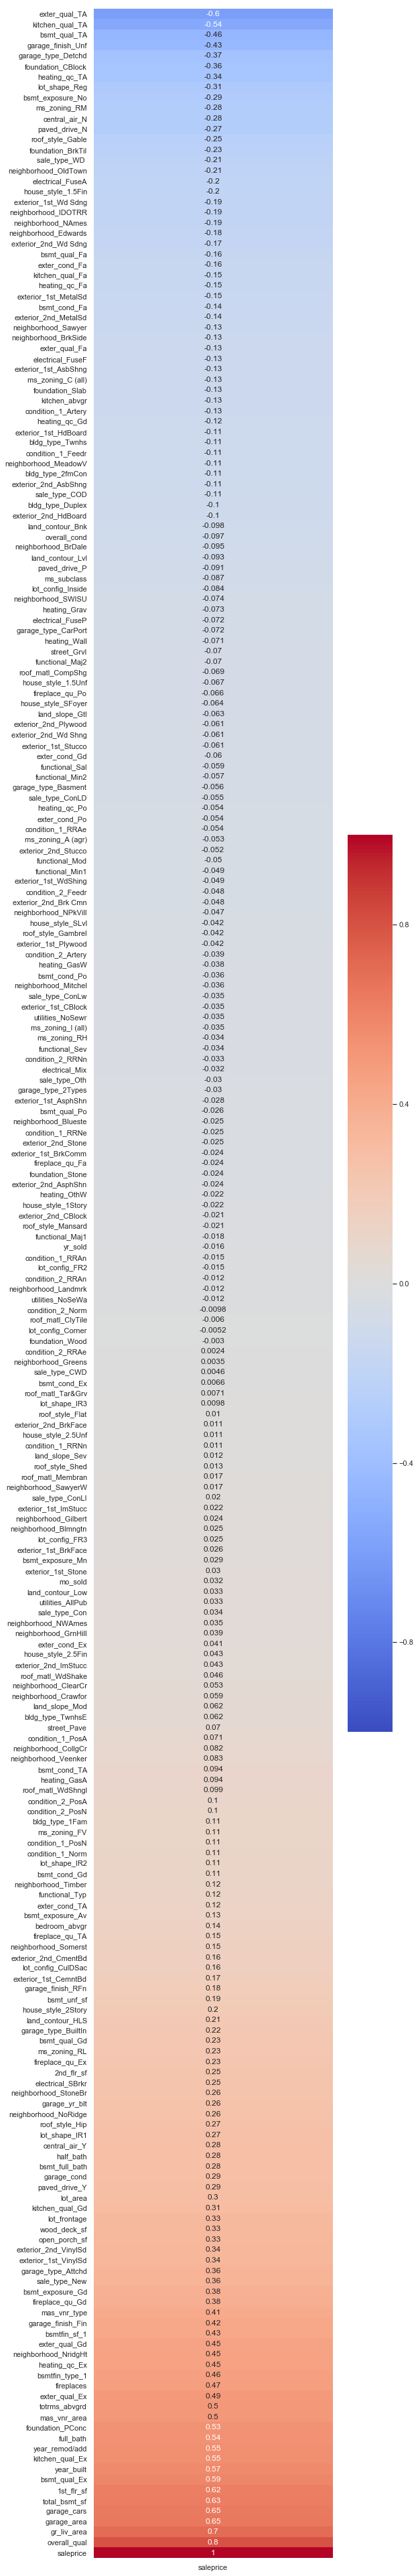

In [54]:
sns.set(rc={'figure.figsize':(8,70)})
sns.heatmap(nonull_with_dummies.drop(columns=['id'])
                             .corr()[['saleprice']].sort_values('saleprice'), annot=True, cmap='coolwarm', vmin=-1);

## <a name = 'Model' > Model <a/>

In [55]:
all_features = nonull_with_dummies.drop(columns=['id', 'saleprice']).columns
X = nonull_with_dummies[all_features]
y = nonull_with_dummies['saleprice']

In [56]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, random_state=42)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_hold_sc = ss.transform(X_hold)

C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Rauan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [57]:
lr = LinearRegression()
ridge = RidgeCV(cv=5)
lasso = LassoCV(cv=5)

In [58]:
print(cross_val_score(lr, X_train_sc, y_train, cv=5).mean())
print(cross_val_score(ridge, X_train_sc, y_train, cv=5).mean())
print(cross_val_score(lasso, X_train_sc, y_train, cv=5).mean())

-3.1138706865794874e+24
0.8303527960639414
0.8430832451001684


In [59]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [60]:
lasso.score(X_train_sc, y_train)

0.9125098146919289

In [61]:
lasso.score(X_hold_sc, y_hold)

0.9126711850777551

In [62]:
predics = lasso.predict(X_hold_sc)

In [63]:
residuals = y_hold - predics

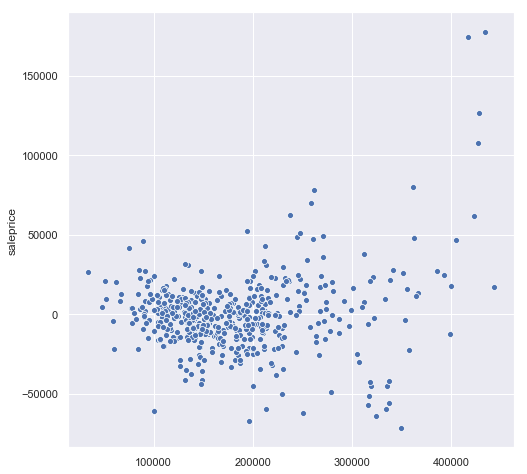

In [64]:
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(predics, residuals);

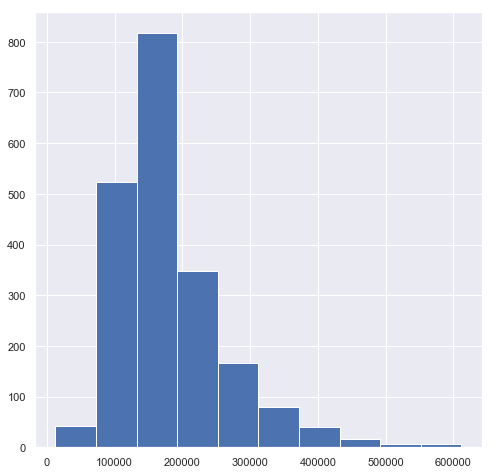

In [65]:
y.hist();

## <a name = 'Coefficients' > Coefficients analysis <a/>
Cheking what features were regularized by lasso
- creating new feature list that impacts the predictions

In [66]:
regular_coef = lasso.coef_
feature_coefs = pd.DataFrame({'all_features': all_features, 'regular_coef': regular_coef})

In [67]:
feature_coefs.nlargest(10,'regular_coef')

,all_features,regular_coef
15,gr_liv_area,21680.982981
3,overall_qual,11289.426306
78,neighborhood_NridgHt,7936.118918
205,kitchen_qual_Ex,7928.657283
5,year_built,6777.082394
25,garage_area,5779.565136
84,neighborhood_StoneBr,5732.947718
77,neighborhood_NoRidge,5717.997292
185,bsmt_exposure_Gd,5341.799329
4,overall_cond,5270.248083


In [68]:
feature_coefs.nsmallest(10,'regular_coef')

,all_features,regular_coef
123,roof_matl_ClyTile,-11506.589623
0,ms_subclass,-3232.026140
162,exter_qual_TA,-2181.806316
66,neighborhood_Edwards,-2029.942976
44,land_contour_Bnk,-1797.305299
79,neighborhood_OldTown,-1287.452256
37,ms_zoning_RM,-1151.125670
20,kitchen_abvgr,-1069.016939
121,roof_style_Mansard,-1034.387609
208,kitchen_qual_TA,-1033.559694


In [69]:
# code from project 1
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16, 10))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column]) 
        
        ax[i].set_title(list_of_titles[i], loc='center', fontsize = 20)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize = 8)
    

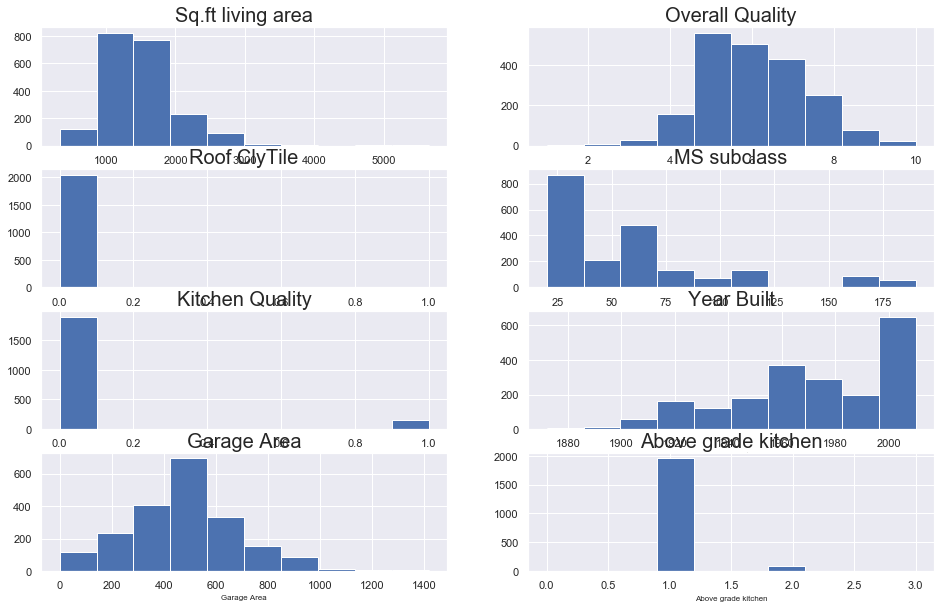

In [70]:
subplot_histograms(nonull_with_dummies, ['gr_liv_area', 'overall_qual', 'roof_matl_ClyTile',\
                                         'ms_subclass', 'kitchen_qual_Ex', 'year_built', 'garage_area',
                                        'kitchen_abvgr'],\
                  ['Sq.ft living area', 'Overall Quality', 'Roof ClyTile',\
                                         'MS subclass', 'Kitchen Quality', 'Year Built', 'Garage Area',\
                  'Above grade kitchen'],\
                  ['Sq.ft living area', 'Overall Quality', 'Roof ClyTile',\
                                         'MS subclass', 'Kitchen Quality', 'Year Built', 'Garage Area',\
                  'Above grade kitchen'])

**The distribution of the saleprice and features such as 'above the ground living area sq.feat' and 'overall quality' should probably be normalized**

In [71]:
necessary_feats = feature_coefs[(abs(feature_coefs['regular_coef']) > 1000)]

# creating list of features with higher absolute coefficients
lst_nec_feat = []
for i in necessary_feats.iteritems():
    for j in necessary_feats.all_features:
        lst_nec_feat.append(j)

In [72]:
# Normalizing certaing features doesn't add value to my model

# nonull_with_dummies['gr_liv_area'] = nonull_with_dummies['gr_liv_area'].map(np.log)
# nonull_with_dummies['overall_qual'] = nonull_with_dummies['overall_qual'].map(np.log)

In [73]:
X2 = nonull_with_dummies[lst_nec_feat]
y2 = nonull_with_dummies['saleprice']

In [74]:
X2_train, X2_hold, y2_train, y2_hold = train_test_split(X2, y2, random_state=42)
y2_train_pt = y2_train.map(np.log)
y2_hold_pt = y2_hold.map(np.log)

In [75]:
ss = StandardScaler()
X2_train_sc = ss.fit_transform(X2_train)
X2_hold_sc = ss.fit_transform(X2_hold)

C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [76]:
lr2 = LinearRegression()
ridge2 = RidgeCV(cv=5)
lasso2 = LassoCV(cv=5)

In [77]:
print(cross_val_score(lr2, X2_train_sc, y2_train_pt, cv=5).mean())
print(cross_val_score(ridge2, X2_train_sc, y2_train_pt, cv=5).mean())
print(cross_val_score(lasso2, X2_train_sc, y2_train_pt, cv=5).mean())

-3.943498078716028e+20
0.8517252071370367
0.8523120167247293


In [78]:
lasso2.fit(X2_train_sc, y2_train_pt)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [79]:
lasso2.score(X2_train_sc, y2_train_pt)

0.8915271305409699

In [80]:
lasso2.score(X2_hold_sc, y2_hold_pt)

0.9145634683541611

**The score is pretty good = this means that 91% of variance in holdout dataset can be explained by training dataset**

In [81]:
preds = lasso2.predict(X2_hold_sc)

In [82]:
pred_transformed = np.exp(preds)

In [83]:
resids = y2_hold_pt - preds

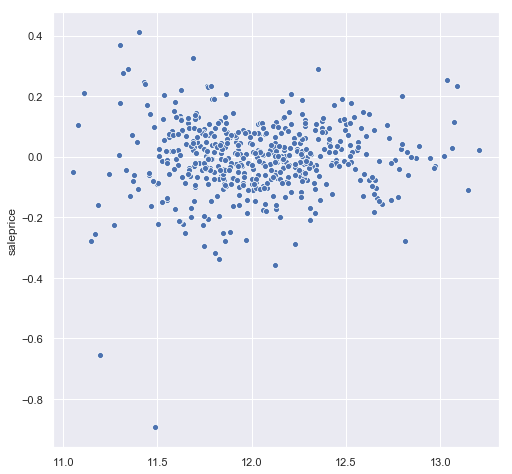

In [84]:
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(preds, resids);

## <a name = 'Test' > Test dataset <a/>
**Cleaning and preparing the dataset for Kaggle submission**

In [85]:
test_df = pd.read_csv('./datasets/test.csv')

In [86]:
test_df.isnull().sum().sort_values(ascending=False).head(20)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
Bsmt Exposure      25
BsmtFin Type 1     25
Bsmt Qual          25
BsmtFin Type 2     25
Bsmt Cond          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
Overall Cond        0
dtype: int64

**Perform the same data EDA as with the training data**

In [87]:
test_df.columns = test_df.columns.str.lower().str.replace(' ', '_')

In [88]:
test_df_nonull = test_df.drop(['pid', 'pool_qc', 'misc_feature', 'alley', 'fence'], axis=1)

In [89]:
test_df_nonull = test_df_nonull.drop(columns=numcols_to_drop)

In [90]:
test_df_nonull['lot_frontage'].fillna(test_df_nonull['lot_frontage'].median(), inplace=True)

In [91]:
test_df_nonull['mas_vnr_area'].fillna(0, inplace=True)

In [92]:
test_df_nonull.mas_vnr_type = test_df_nonull.mas_vnr_type.map(lambda x: 0 if x=='None' else 1)

In [93]:
test_df_nonull = test_df_nonull.drop(['garage_qual'], axis=1)

In [94]:
test_df_nonull['garage_cond'] = test_df_nonull['garage_cond'].map(lambda cell: 1 if cell in above_ave else 0)

In [95]:
test_df_nonull = test_df_nonull.drop(columns = 'bsmtfin_type_2')

In [96]:
test_df_nonull['bsmtfin_type_1'] = test_df_nonull['bsmtfin_type_1'].map(lambda cell: 1 if cell=='GLQ' else 0)

In [97]:
test_df_nonull.garage_yr_blt.fillna(0, inplace=True)

In [98]:
test_df_nonull.isnull().sum().sort_values(ascending=False).head(5)

fireplace_qu     422
garage_finish     45
garage_type       44
bsmt_qual         25
bsmt_exposure     25
dtype: int64

In [99]:
test_nonull_with_dummies = pd.get_dummies(test_df_nonull)

In [100]:
test_nonull_with_dummies.isnull().sum().sum()

0

In [101]:
test_nonull_with_dummies.shape

(879, 230)

In [102]:
to_add_feats = set(nonull_with_dummies.columns) - set(test_nonull_with_dummies.columns)

In [103]:
to_drop_feat = set(test_nonull_with_dummies.columns) - set(nonull_with_dummies.columns)

In [104]:
for col in to_add_feats:
    if col != 'saleprice':
        test_nonull_with_dummies[col]=0

In [105]:
test_nonull_with_dummies.drop(columns = to_drop_feat, inplace=True)

In [106]:
# test_nonull_with_dummies['gr_liv_area'] = test_nonull_with_dummies['gr_liv_area'].map(np.log)
# test_nonull_with_dummies['overall_qual'] = test_nonull_with_dummies['overall_qual'].map(np.log)

In [107]:
X2_test = test_nonull_with_dummies[lst_nec_feat]

In [108]:
X2_test_ss = ss.transform(X2_test)

C:\Users\Rauan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [109]:
predictions = lasso2.predict(X2_test_ss)

In [110]:
predictions_transformed = np.exp(predictions)

In [111]:
test_df_nonull['saleprice'] = predictions_transformed

In [112]:
submission = test_df_nonull[['id', 'saleprice']]

In [113]:
submission.to_csv('6-27-lasso.csv', index=False)

Checking the correlation

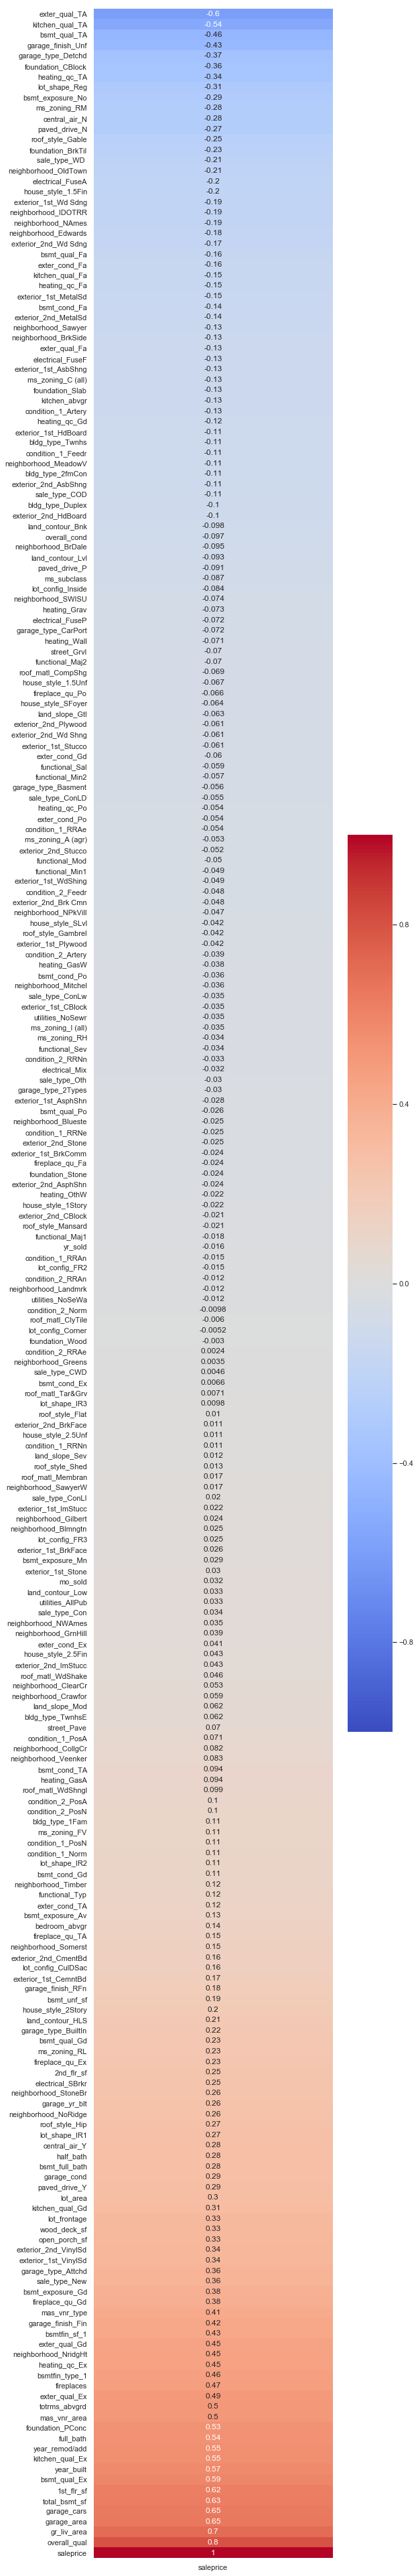

In [114]:
sns.set(rc={'figure.figsize':(8,70)})
sns.heatmap(nonull_with_dummies.drop(columns=['id'])
                             .corr()[['saleprice']].sort_values('saleprice'), annot=True, cmap='coolwarm', vmin=-1);

## <a name = 'Featurevis' > Feature visualization and EDA <a/>

In [115]:
# creating list of features with highest coefficients
featcoeflst = list(feature_coefs.nlargest(10,'regular_coef')['all_features'].values)

In [116]:
# appending the list with the strongest negative coefficients
featcoeflst.append(list(feature_coefs.nsmallest(10,'regular_coef')['all_features'].values))

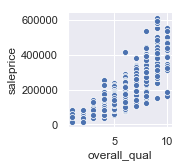

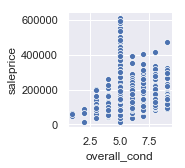

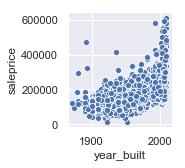

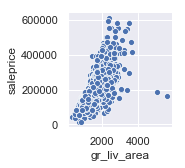

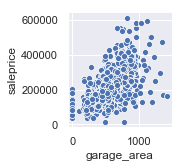

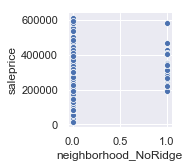

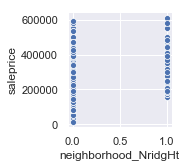

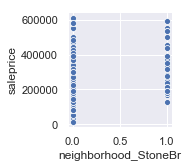

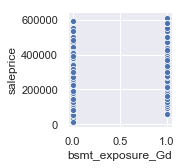

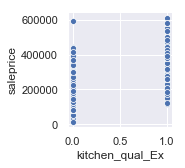

In [117]:
# creating pairplots with the feature list

sns.set(rc={'figure.figsize':(10, 10)})
for col in nonull_with_dummies.columns:
    if col in featcoeflst:
        sns.pairplot(data=nonull_with_dummies, x_vars = col, y_vars='saleprice')

In [118]:
# save the file to csv
nonull_with_dummies.to_csv('ames_housing.csv')

In [119]:
nwd_viz = nonull_with_dummies

In [120]:
nwd_viz['gr_liv_area'].describe()

count    2045.000000
mean     1498.104156
std       498.267196
min       334.000000
25%      1128.000000
50%      1442.000000
75%      1728.000000
max      5642.000000
Name: gr_liv_area, dtype: float64

In [121]:
def binner(i):
    if i < 1000:
        return 'less than 1000'
    elif i < 2000:
        return 'less than 2000'
    elif i < 3000:
        return 'less than 3000'
    elif i < 4000:
        return 'less than 4000'
    else:
        return 'less than 5000'

In [122]:
nwd_viz['gr_liv_area_binned'] = nwd_viz['gr_liv_area'].map(binner)

In [123]:
nwd_viz.groupby('gr_liv_area_binned')['saleprice'].mean()

gr_liv_area_binned
less than 1000    110345.128814
less than 2000    176020.061100
less than 3000    281131.045977
less than 4000    393230.285714
less than 5000    171925.000000
Name: saleprice, dtype: float64

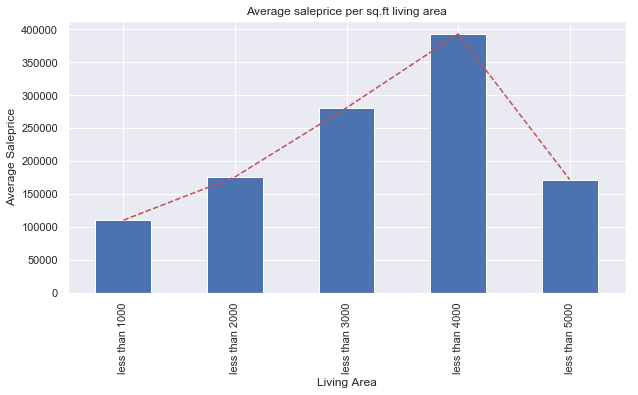

In [124]:
nwd_viz.groupby('gr_liv_area_binned')['saleprice'].mean().plot(kind='bar',\
                                                               figsize=(10, 5))\
.set(ylabel = 'Average Saleprice', xlabel = 'Living Area') 
y = [110345.128814, 176020.061100, 281131.045977, 393230.285714, 171925.000000]
x = ['less than 1000', 'less than 2000', 'less than 3000 ', 'less than 4000', 'less than 5000']
plt.plot(x,y, 'r--')
plt.title('Average saleprice per sq.ft living area');

In [125]:
nwd_viz.gr_liv_area_binned.value_counts()

less than 2000    1473
less than 1000     295
less than 3000     261
less than 4000      14
less than 5000       2
Name: gr_liv_area_binned, dtype: int64

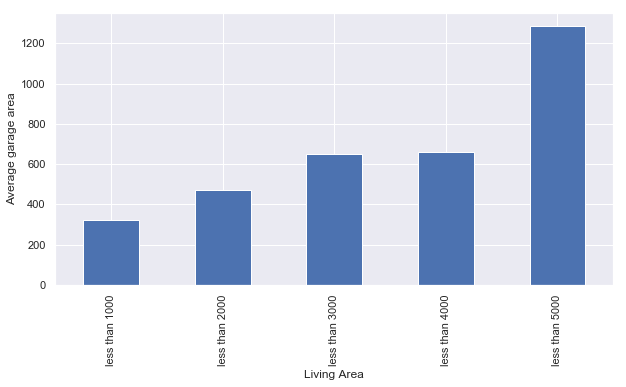

In [126]:
nwd_viz.groupby('gr_liv_area_binned')['garage_area'].mean().plot(kind='bar',\
                                                               figsize=(10, 5))\
.set(ylabel = 'Average garage area', xlabel = 'Living Area');

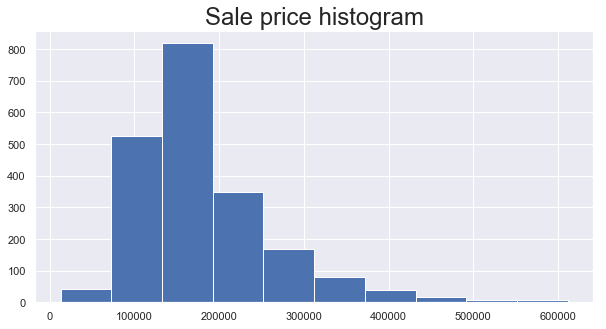

In [127]:
plt.figure(figsize=(10, 5))
nwd_viz.saleprice.hist()
plt.title('Sale price histogram', fontsize=24);

**It appears that the average saleprice for the houses with less than 4000 sq.ft is higher. Although, having only 2 entries for 4000-5000 may not actually be a good representation.**

In [128]:
nwd_viz['overall_qual'].describe()

count    2045.000000
mean        6.113447
std         1.426215
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall_qual, dtype: float64

In [129]:
nwd_viz['overall_qual'].value_counts()

5     560
6     506
7     430
8     249
4     158
9      77
3      29
10     23
2       9
1       4
Name: overall_qual, dtype: int64

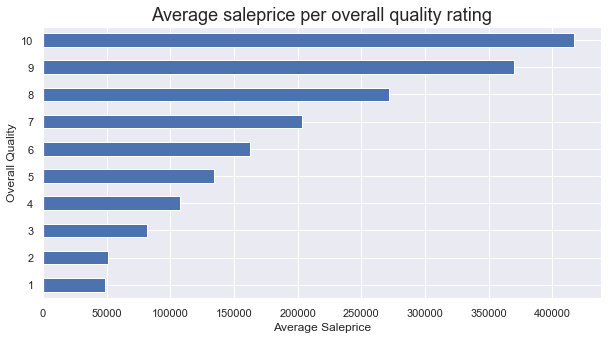

In [130]:
nwd_viz.groupby(nwd_viz['overall_qual'])['saleprice'].mean().plot(kind='barh',\
                                                               figsize=(10, 5))\
.set(ylabel = 'Overall Quality', xlabel = 'Average Saleprice')
plt.title('Average saleprice per overall quality rating', fontsize=18);

In [131]:
feature_coefs.nlargest(20,'regular_coef')

,all_features,regular_coef
15,gr_liv_area,21680.982981
3,overall_qual,11289.426306
78,neighborhood_NridgHt,7936.118918
205,kitchen_qual_Ex,7928.657283
5,year_built,6777.082394
25,garage_area,5779.565136
84,neighborhood_StoneBr,5732.947718
77,neighborhood_NoRidge,5717.997292
185,bsmt_exposure_Gd,5341.799329
4,overall_cond,5270.248083


In [132]:
feature_coefs.nsmallest(20,'regular_coef')

,all_features,regular_coef
123,roof_matl_ClyTile,-11506.589623
0,ms_subclass,-3232.026140
162,exter_qual_TA,-2181.806316
66,neighborhood_Edwards,-2029.942976
44,land_contour_Bnk,-1797.305299
79,neighborhood_OldTown,-1287.452256
37,ms_zoning_RM,-1151.125670
20,kitchen_abvgr,-1069.016939
121,roof_style_Mansard,-1034.387609
208,kitchen_qual_TA,-1033.559694


In [133]:
neighborhood_columns = [c for c in nwd_viz.columns if c[0]=='n']

In [134]:
neighborhoods_to_check = df.neighborhood.value_counts().head(6).index

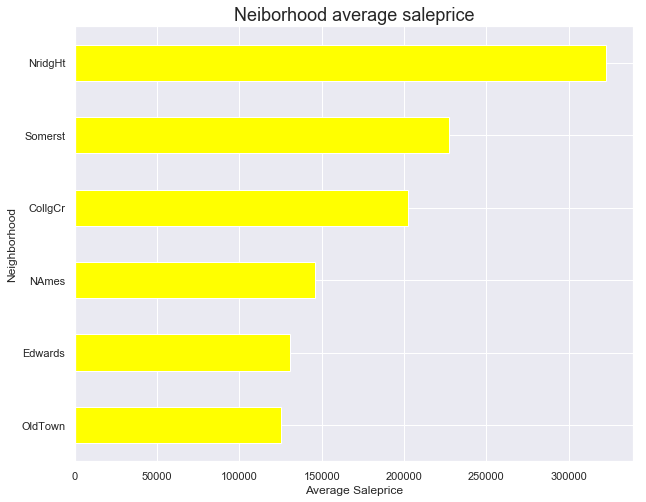

In [135]:
plt.figure(figsize=(10,8))
df[df['neighborhood'].isin(neighborhoods_to_check)].groupby('neighborhood')['saleprice'].mean()\
.sort_values().plot(kind='barh', color='yellow')\
.set(ylabel = 'Neighborhood', xlabel = 'Average Saleprice')
plt.title('Neiborhood average saleprice', fontsize=18);

In [136]:
nwd_viz.roof_matl_ClyTile.value_counts()

0    2044
1       1
Name: roof_matl_ClyTile, dtype: int64

In [137]:
df.roof_matl.value_counts()

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: roof_matl, dtype: int64

**Clay or tile roof material has a negative effect on the price, it's only one entry and has the strongest negative effect on the price. It is an outlier though, however this definitely affects the price and should be taken into account within the model to better predict the prices**

In [138]:
nwd_viz['garage_area'].describe()

count    2045.000000
mean      473.451345
std       215.934791
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: garage_area, dtype: float64

In [139]:
def bin_garage_area(i):
    if i == 0:
        return 'No garage'
    elif i < 250:
        return 'less than 250'
    elif i < 500:
        return 'less than 500'
    elif i < 750:
        return 'less than 750'
    elif i < 1000:
        return 'less than 1000'
    elif i < 1250:
        return 'less than 1250'
    else:
        return 'less than 1500'

In [140]:
nwd_viz['garage_area_binned'] = nwd_viz['garage_area'].map(bin_garage_area)

In [141]:
nwd_viz.groupby(['garage_area_binned'])['saleprice'].mean()

garage_area_binned
No garage         105669.150442
less than 1000    294299.790816
less than 1250    336096.315789
less than 1500    273875.000000
less than 250     124837.527132
less than 500     154766.234783
less than 750     204005.963855
Name: saleprice, dtype: float64

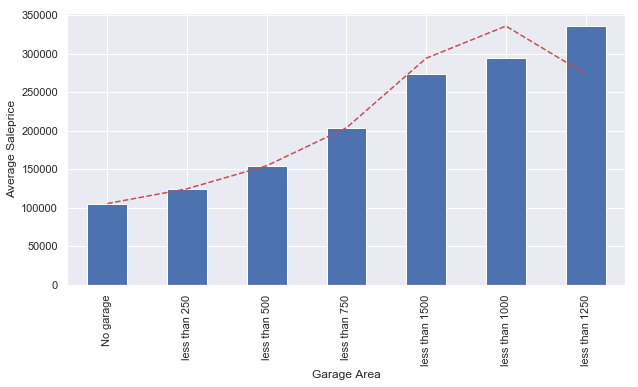

In [142]:
nwd_viz.groupby(['garage_area_binned'])['saleprice'].mean()\
.sort_values().plot(kind='bar',figsize=(10, 5))\
.set(ylabel = 'Average Saleprice', xlabel = 'Garage Area')

y = [105669.150442, 124837.527132, 154766.234783, 204005.963855, 294299.790816, 336096.315789, 273875.000000]
x = ['No garage', 'less than 250', 'less than 500', 'less than 750', 'less than 1000', 'less than 1250', 'less than 1500']
plt.plot(x,y, 'r--');

In [143]:
nwd_viz.year_built.describe()

count    2045.000000
mean     1971.703178
std        30.169765
min      1872.000000
25%      1954.000000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: year_built, dtype: float64

In [144]:
def bin_year_built(i):
    if i <= 1900:
        return '1900 and earlier'
    elif i <= 1930:
        return '1930 and earlier'
    elif i <= 1960:
        return '1960 and earlier'
    elif i <= 1990:
        return '1990 and earlier'
    elif i <= 2010:
        return '2010 and earlier'
    else:
        return 'less than 1500'

In [145]:
nwd_viz['year_built_binned'] = nwd_viz['year_built'].map(bin_year_built)

In [146]:
nwd_viz['year_built_binned'].value_counts()

2010 and earlier    779
1990 and earlier    564
1960 and earlier    432
1930 and earlier    231
1900 and earlier     39
Name: year_built_binned, dtype: int64

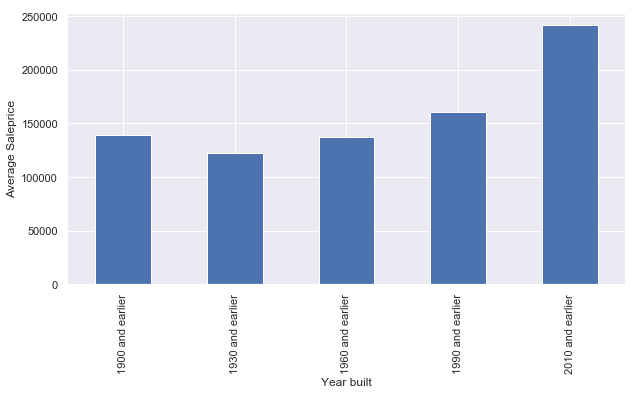

In [147]:
nwd_viz.groupby(['year_built_binned'])['saleprice'].mean().plot(kind='bar',\
                                                               figsize=(10, 5))\
.set(ylabel = 'Average Saleprice', xlabel = 'Year built');

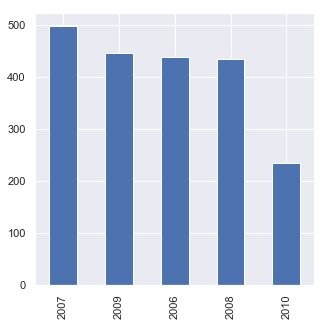

In [148]:
plt.figure(figsize=(5,5))
df.yr_sold.value_counts().plot(kind='bar');

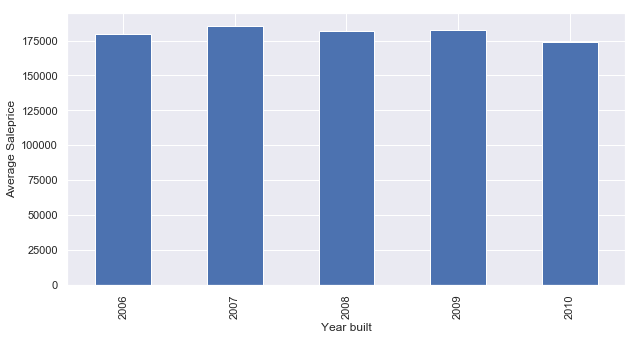

In [149]:
nwd_viz.groupby(['yr_sold'])['saleprice'].mean().plot(kind='bar',\
                                                      figsize=(10, 5))\
.set(ylabel = 'Average Saleprice', xlabel = 'Year built');

In [150]:
df.groupby(['yr_sold'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
yr_sold,,,,,,,,
2006,438.0,179471.609589,81906.247408,35000.0,129575.0,159250.0,213342.5,584500.0
2007,498.0,185524.514056,77140.408272,39300.0,130000.0,167150.0,215750.0,591587.0
2008,435.0,181750.372414,77388.336168,13100.0,129500.0,163000.0,219413.0,475000.0
2009,446.0,182455.244395,81882.460077,34900.0,129925.0,163000.0,213000.0,582933.0
2010,234.0,174180.059829,77047.778280,12789.0,128000.0,155000.0,206000.0,611657.0


In [151]:
df.groupby(['mo_sold'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
mo_sold,,,,,,,,
1,79.0,195126.303797,96005.746428,39300.0,127975.0,172500.0,251000.0,582933.0
2,104.0,177626.519231,73747.487843,13100.0,128000.0,166500.0,211000.0,552000.0
3,168.0,174625.779762,81066.838688,52500.0,128437.5,156466.0,195975.0,611657.0
4,208.0,163901.269231,62401.301983,64500.0,124000.0,148200.0,189250.0,555000.0
5,257.0,180332.369650,74491.555941,37900.0,132000.0,164000.0,213000.0,584500.0
6,352.0,182662.798295,79605.637779,12789.0,134875.0,160000.0,213437.5,591587.0
7,303.0,188571.514851,83600.796598,40000.0,133600.0,168000.0,216500.0,556581.0
8,167.0,186927.359281,79788.384273,64500.0,129000.0,170000.0,226437.5,500067.0
9,109.0,188990.761468,90199.309549,44000.0,123500.0,170000.0,235876.0,545224.0


In [152]:
pd.DataFrame(df.groupby(['yr_sold'])['saleprice'].max())

,saleprice
yr_sold,
2006,584500
2007,591587
2008,475000
2009,582933
2010,611657


## <a name = 'Conclusion' > Conclusion <a/>

**In conclusion:**



1. House prices dropped in 2008 but that was due to overall US property crisis. However, the market recovered in 2008 and it seems that's the maximum price is on the rise


2. Certain features such as Overall quality and Sq.ft area, and of course Location have practically linear relationship with the Sale price


3. The newer your house the better the price


*But there are some peculiarities:*


4. There are features that add up to the value of the house up to a certain point, and then either have no further effect or may even diminish the price:


    - For example, there is 140 thousand price jump from not having a pool to having a pool. But as the pool area increases the prices doesnt necessarily follow this trend. As long as you have a pool up to 250sq.ft you'll can claim the higher value for your house
    
    
    - The same with the garage cars: if your garage fits 3 cars you can claim the higher average price for your house, but having more spaces in your garage doesn't linearly adds up to the selling price
    
    
    - Absence or presence of the fireplaces doesn't result in price jump, but having 1-2 fireplaces certainly increase the value. Yet 3 or more fireplaces don't
    
    
5. Another interesting observation is time of year has a profound effect on average selling price. So in warmer months starting from May till August, the average sale price rises subtantially. This may be due to school migration effect, when families move to a different area so children can attend certain schools


6. Also, not having school district as a feature in the dataset limits the model. So in order to make a better model more data including School districts should be included. It certainly plays the most important role in picking the place to rent.

**Summary on the model:**

- The model with less coefficients may certainly perform better, but I feel that most of the features should be included in predicting the price. As they do impact the house value more or less. For instance, Claytile roof material adversely effect the price, even with one entry. So more simplistic model won't cover housing data to full extent.


- Also, I'm glad I created dummies for categorical features as Excellent condition of the exterior, or Good garage condition, or Above average basement certainly add value to the house price


- So the best Regression model for this type of dataset is the Lasso model, as it zeros out not important features and allows to use a good number of features